In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from array import array
import time
import scipy.stats as st
import seaborn as sns
import pandas as pd
import math
import pickle

In [4]:
np.random.seed(0)
def logist(x):
    return 1/(1+np.exp(-x))
def C_sigma(N,s_x,lbd):
    #N为分割份数，V为区间边界，s_x为正态分布方差，lbd为lambda正则化项系数，论文中取10.
    #第一个为起点，第二个为终点，第三个为步长。
    V=10
    i=np.arange(-2*N,2*N+1)
    #i=np.arange(-N,N+1)
    j=np.arange(-N,N+1)
    X=i*V/N
    Y=j*V/N
    m=len(X)
    n=len(Y)
    X_1=X.reshape(m,1)
    X_1=np.column_stack((X,np.ones((m,1))))
    Y_1=Y.reshape(1,n)
    Y_1=np.row_stack((np.ones((1,n)),-Y))
    M=X_1.dot(Y_1)
    
    M=st.norm.cdf(M,0,s_x)
    v=logist(X)
    #v=st.norm.cdf(X,0,s_x)
    u=M.T.dot(M)+lbd*np.eye((n))
    u=np.linalg.inv(u).dot(M.T).dot(v)
    return u

In [5]:
N=4000
V=10
i=np.arange(-2*N,2*N+1)
#i=np.arange(-N,N+1)
j=np.arange(-N,N+1)
X=i*V/N
Y=j*V/N 
u=C_sigma(N,1,10)
#u为密度函数

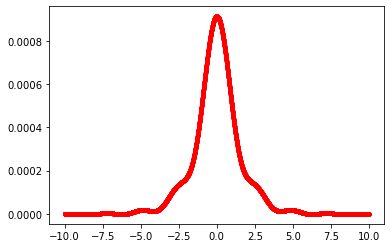

In [6]:
u=np.maximum(u,0)
plt.plot(Y,u,label='sin(x)',color='red', linewidth=3,marker='o',markersize=3)

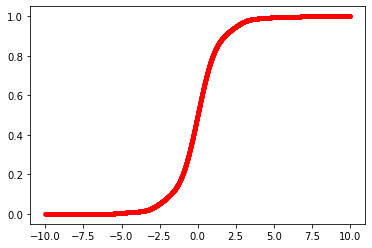

In [7]:
#计算累计分布cdf，并绘制图像
def cdf_val(p,X):
    p_norm = p/np.trapz(p,X)
    return np.array([np.trapz(p_norm[:n],X[:n]) for n in range(len(p_norm))])  
cdf=cdf_val(u,Y)
plt.plot(Y,cdf,label='sin(x)',color='red', linewidth=3,marker='o',markersize=3)

In [8]:
#xvals为累计分布函数的定义域，r为0到1的随机数
def fun_inv(xvals,cdf_vals,r):
    """
    函数是给定 0<u<1,然后根据xvals 和cdf_vals 定义的CDF函数，求出对应的x，使得CDF(x)约等于u
    函数的思路是对于给定的u，找到cdf_vals中比u大的数，由于cdf_vals是和xvals是一一对应的，
    所以可以找到大于 u 的cdf_vals中的最小值，对应的xvals就是对F^{-1}(u)的估计。 

    这里要求xvals和cdf_vals都是升序排列的。
    """
    if isinstance(r,np.ndarray):
        assert(np.all(np.logical_and(0<r,r<1)))
        num_u = r.shape[0]
        xouts = np.zeros((num_u))
        for ii in range(num_u):
            inds = (cdf_vals>r[ii]).nonzero()
            if len(inds[0])>0:
                xouts[ii] = xvals[inds[0][0]]
            else:
                xouts[ii]=xvals[-1]
        return xouts
    else:
        assert(0<r<1)
        ind = (cdf_vals>r).nonzero()
        xout = xvals[ind[0][0]]
        return xout

In [9]:
r=np.random.rand(4000)
#y为在cdf中抽样的样本，样本量与r一致
Xc_4000=fun_inv(Y,cdf,r)


In [10]:
file = open('Xc_4000.pickle', 'wb') #以.pickle格式保存；二进制写入
pickle.dump(Xc_4000, file) #将a_dict内容写入file
file.close()